In [1]:
import tensorflow as tf
from  tensorflow.keras import models,layers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_size = 256
batch_size = 32
Channels = 3
Epochs= 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"plant",
shuffle = True,
image_size = (image_size,image_size),
batch_size = batch_size
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names

In [5]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

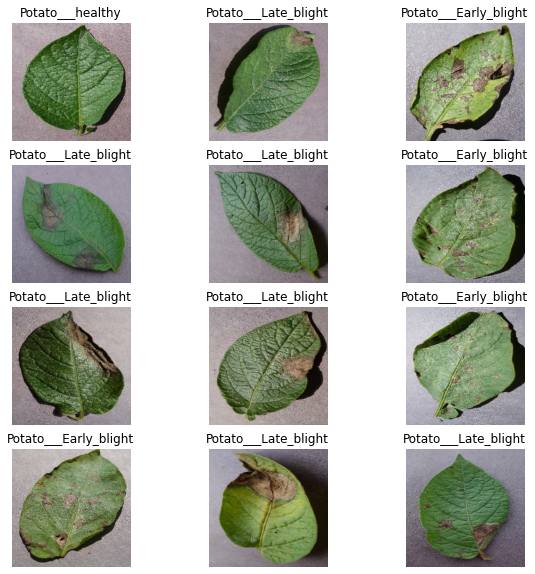

In [7]:
plt.figure(figsize = (10,10))
for image_batch, label in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4,3,i+1)
        plt.title(class_names[label[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis('off')
   

In [8]:
len(dataset)*.8

54.400000000000006

In [9]:
train_ds = dataset.take(54)

In [10]:
test_ds = dataset.skip(54)

In [11]:
val_ds = test_ds.take(6)

In [12]:
test_ds = test_ds.skip(6)

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [17]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [18]:
input_shape = (batch_size, image_size,image_size, Channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=30)

Epoch 1/30
54/54 [==============================] - 418s 5s/step - loss: 0.6831 - accuracy: 0.7008 - val_loss: 0.6404 - val_accuracy: 0.7812
Epoch 2/30
54/54 [==============================] - 207s 4s/step - loss: 0.3400 - accuracy: 0.8709 - val_loss: 0.2480 - val_accuracy: 0.9271
Epoch 3/30
54/54 [==============================] - 186s 3s/step - loss: 0.1759 - accuracy: 0.9392 - val_loss: 0.3048 - val_accuracy: 0.8854
Epoch 4/30
54/54 [==============================] - 206s 4s/step - loss: 0.1465 - accuracy: 0.9473 - val_loss: 0.1340 - val_accuracy: 0.9583
Epoch 5/30
54/54 [==============================] - 162s 3s/step - loss: 0.0695 - accuracy: 0.9745 - val_loss: 0.1572 - val_accuracy: 0.9479
Epoch 6/30
54/54 [==============================] - 170s 3s/step - loss: 0.1081 - accuracy: 0.9606 - val_loss: 0.0716 - val_accuracy: 0.9740
Epoch 7/30
54/54 [==============================] - 161s 3s/step - loss: 0.1164 - accuracy: 0.9566 - val_loss: 0.2563 - val_accuracy: 0.9062
Epoch 8/30
54

In [22]:
model.evaluate(test_ds)

8/8 [==============================] - 47s 575ms/step - loss: 0.1285 - accuracy: 0.9741


[0.12847714126110077, 0.9741379022598267]

In [23]:
history

In [24]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
history.history['accuracy']

[0.7008101940155029,
 0.8709490895271301,
 0.9392361044883728,
 0.9473379850387573,
 0.9745370149612427,
 0.9606481194496155,
 0.9565972089767456,
 0.9745370149612427,
 0.9803240895271301,
 0.9907407164573669,
 0.9872685074806213,
 0.9554398059844971,
 0.9450231194496155,
 0.9913194179534912,
 0.9994212985038757,
 1.0,
 1.0,
 0.9988425970077515,
 0.9907407164573669,
 0.9751157164573669,
 0.9994212985038757,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [27]:
acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

Text(0.5, 1.0, 'train and validation loss')

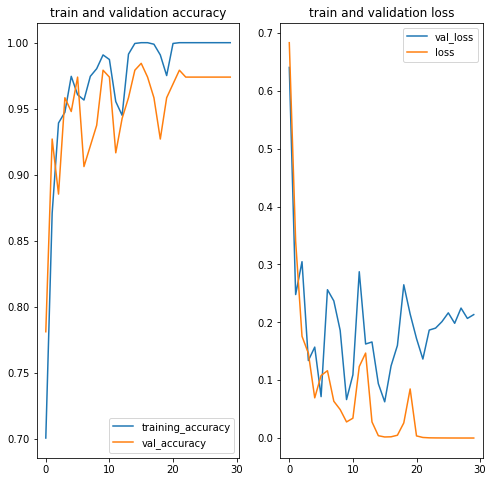

In [28]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(30),acc,label = 'training_accuracy')
plt.plot(range(30),val_accuracy,label = 'val_accuracy')
plt.legend(loc='lower right')
plt.title("train and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(30),val_loss,label = 'val_loss')
plt.plot(range(30),loss,label = 'loss')
plt.legend(loc='upper right')
plt.title("train and validation loss")

first image to predict
actual_label: Potato___Late_blight
1/1 [==============================] - 5s 5s/step
predict_label: Potato___Late_blight


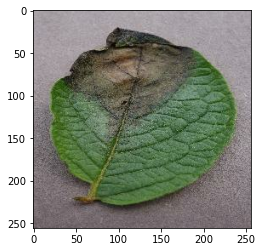

In [29]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label= label_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print('actual_label:',class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print('predict_label:',class_names[np.argmax(batch_prediction[0])])